## Calculate sensitivity curve from a set of IRFs

In [12]:
from dl2_tools.maker import PSSensitivityCalculator
from dl2_tools.handler import IRFHandler
from gammapy.irf import EffectiveAreaTable2D,EnergyDispersion2D,PSF3D,Background2D
import pkg_resources
import os
import matplotlib.pyplot as plt

Get the directory where the data that comes with the package is stored

In [4]:
dl2_tools_dir = pkg_resources.resource_filename("dl2_tools","")
data_dir = os.path.join(dl2_tools_dir, 'data')

Load the IRFs from file

In [5]:
aeff=EffectiveAreaTable2D.read(os.path.join(data_dir,"irfs/Aeff_true_0.01TeV_200.0TeV_49bins_fov_off_0.0deg_0.1deg_1bins_.fits"))
psf=PSF3D.read(os.path.join(data_dir,"irfs/PSF_true_0.01TeV_200.0TeV_49bins_psf_off_0.0deg_2.0deg_499bins_fov_off_0.0deg_0.1deg_1bins_.fits"))
edisp=EnergyDispersion2D.read(os.path.join(data_dir,"irfs/Edisp_true_0.01TeV_200.0TeV_49bins_reco_0.01_10.0_49bins_fov_off_0.0deg_0.1deg_1bins_.fits"))
bkg=Background2D.read(os.path.join(data_dir,"irfs/bkg_reco_0.01TeV_200.0TeV_49bins_fov_off_0.0deg_10.0deg_9bins_.fits"))

And pass these to an IRFHandler. In areal workflow, you would probebly directly get passed an IRFHandler from an IRFMaker that creates the IRFs from dl2 data

In [6]:
irf_handler=IRFHandler(aeff=aeff,edisp=edisp,psf=psf,bkg_model=bkg)

Then, we set up the PSSensitivityCalculator

In [7]:
ps_sens_calculator=PSSensitivityCalculator()

And calculate the sensitivity table

In [9]:
sens_table=ps_sens_calculator(irf_handler)

In [10]:
sens_table

energy,e2dnde,excess,background,criterion
TeV,erg / (cm2 s),,,
float64,float64,float64,float64,bytes12
0.11885,2.78991e-13,108.638,1051.06,significance
0.16788,2.78768e-13,123.323,1233.23,bkg
0.237137,2.33127e-13,106.093,1001.45,significance
0.334965,2.25864e-13,83.2688,610.136,significance
0.473151,1.8635e-13,65.7166,374.828,significance
0.668344,1.71492e-13,52.6642,236.832,significance
0.944061,1.53035e-13,36.573,110.128,significance
1.33352,2.98829e-14,5.46674,1.07413,significance


Then, we can also plot the sensitvity curve. The plotting script is taken from the gammapy point source sesitvity tutorial. Look there for further information

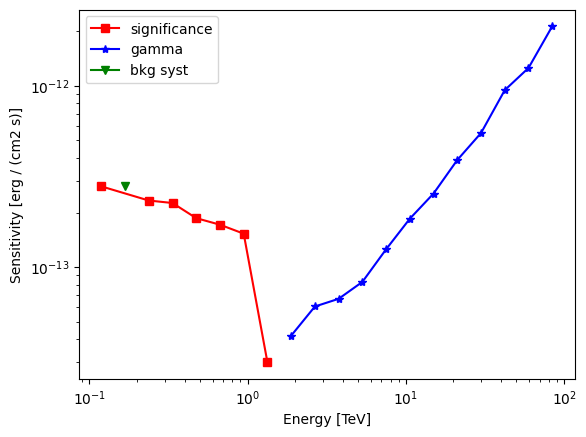

In [14]:
fig,ax=plt.subplots()
PSSensitivityCalculator.plot_sensitvity_curve(ax,sens_table)